## 사용 패키지

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

# 데이터 불러오기

In [2]:
sample_data = pd.read_excel('../data_list/쇼핑몰_최종2.xlsx')
sample_data= sample_data.dropna(axis= 0)
sample_data.head()

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회),건수합계,네이버 태그 클릭량
1,2020.0,생활/사무용품,평일,월,D.14-18시,M,C.4O대,66.7,28.3,17.9,21.0,32.8,2.9,6225.0,21.0
3,2021.0,화장품,휴일,일,D.14-18시,F,C.4O대,89.8,9.3,14.9,17.6,58.2,5.3,3564.0,154.0
4,2020.0,인테리어,평일,월,C.10-14시,F,D.5O대,46.3,28.2,14.1,20.2,37.4,3.4,1101.0,33.0
5,2019.0,식료품,평일,월,B.06-10시,M,E.60대이상,20.3,20.8,21.4,12.3,45.4,3.2,171.0,61.0
11,2019.0,취미용품,휴일,월,D.14-18시,F,E.60대이상,14.5,24.4,27.1,12.9,35.5,2.7,10.0,32.0


# 전처리

In [3]:
le = LabelEncoder()
sample_data['평일휴일'] = le.fit_transform(sample_data['평일휴일'])
sample_data['요일'] = le.fit_transform(sample_data['요일'])
sample_data['시간대'] = le.fit_transform(sample_data['시간대'])
sample_data['성별'] = le.fit_transform(sample_data['성별'])
sample_data['연령대'] = le.fit_transform(sample_data['연령대'])

X= pd.DataFrame(sample_data, 
                columns=['CRI_YM','평일휴일','요일','시간대','성별','연령대','건수합계',
                         '인터넷 쇼핑 이용자 비율 (%)','월 평균 구매빈도-1회 미만 (%)',
                         '월 평균 구매빈도-1~2회 미만 (%)','월 평균 구매빈도-2~3회 미만 (%)',
                         '월 평균 구매빈도-3회 이상 (%)','월 평균 구매빈도-평균 (회)',
                         '네이버 태그 클릭량']
               )
y = sample_data['TAG'].values.reshape(-1,1)
y = pd.DataFrame(y)

nm_scaler = MinMaxScaler()
X_train_scaled = nm_scaler.fit(X)
nm_shop_scaled= nm_scaler.transform(X)
nm_shop_df_scaled= pd.DataFrame(data = nm_shop_scaled, columns=X.columns)

In [4]:
dt_clf = DecisionTreeClassifier(random_state=156)
X_train, X_test, y_train, y_test = train_test_split(nm_shop_df_scaled,
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 3
                                                    )
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy  = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8117


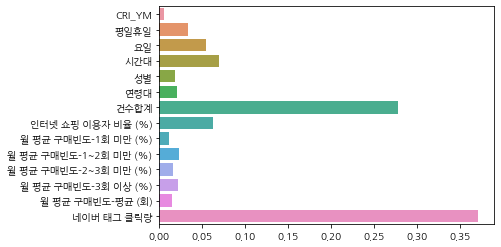

In [5]:
import seaborn as sns
%matplotlib inline

importance = dt_clf.feature_importances_

columns=['CRI_YM','평일휴일','요일','시간대','성별','연령대','건수합계',
                         '인터넷 쇼핑 이용자 비율 (%)','월 평균 구매빈도-1회 미만 (%)',
                         '월 평균 구매빈도-1~2회 미만 (%)','월 평균 구매빈도-2~3회 미만 (%)',
                         '월 평균 구매빈도-3회 이상 (%)','월 평균 구매빈도-평균 (회)',
                         '네이버 태그 클릭량']

sns.barplot(x=importance, y=columns)

In [6]:
le = LabelEncoder()
sample_data['평일휴일'] = le.fit_transform(sample_data['평일휴일'])
sample_data['요일'] = le.fit_transform(sample_data['요일'])
sample_data['시간대'] = le.fit_transform(sample_data['시간대'])
sample_data['성별'] = le.fit_transform(sample_data['성별'])
sample_data['연령대'] = le.fit_transform(sample_data['연령대'])

X= pd.DataFrame(sample_data, 
                columns=['CRI_YM','평일휴일','요일','시간대','성별','연령대','건수합계',
                         '인터넷 쇼핑 이용자 비율 (%)', '네이버 태그 클릭량']
               )
y = sample_data['TAG'].values.reshape(-1,1)
y = pd.DataFrame(y)

nm_scaler = MinMaxScaler()
X_train_scaled = nm_scaler.fit(X)
nm_shop_scaled= nm_scaler.transform(X)
nm_shop_df_scaled= pd.DataFrame(data = nm_shop_scaled, columns=X.columns)

In [7]:
dt_clf = DecisionTreeClassifier(random_state=156)
X_train, X_test, y_train, y_test = train_test_split(nm_shop_df_scaled,
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 3
                                                    )
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy  = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8167


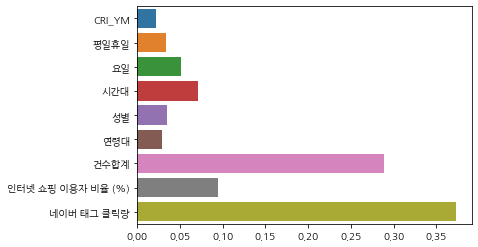

In [8]:
import seaborn as sns
%matplotlib inline

importance = dt_clf.feature_importances_

columns=['CRI_YM','평일휴일','요일','시간대','성별','연령대','건수합계',
                         '인터넷 쇼핑 이용자 비율 (%)', '네이버 태그 클릭량']

sns.barplot(x=importance, y=columns)

In [52]:
le = LabelEncoder()
sample_data['평일휴일'] = le.fit_transform(sample_data['평일휴일'])
sample_data['요일'] = le.fit_transform(sample_data['요일'])
sample_data['시간대'] = le.fit_transform(sample_data['시간대'])
sample_data['성별'] = le.fit_transform(sample_data['성별'])
sample_data['연령대'] = le.fit_transform(sample_data['연령대'])

X= pd.DataFrame(sample_data, 
                columns=['평일휴일','요일','시간대',
                         '성별','연령대','건수합계',
                         '네이버 태그 클릭량']
               )
y = sample_data['TAG'].values.reshape(-1,1)
y = pd.DataFrame(y)

nm_scaler = MinMaxScaler()
X_train_scaled = nm_scaler.fit(X)
nm_shop_scaled= nm_scaler.transform(X)
nm_shop_df_scaled= pd.DataFrame(data = nm_shop_scaled, columns=X.columns)

In [76]:
y.value_counts()

패션         1560
식료품        1560
생활/사무용품    1560
화장품        1558
인테리어       1558
취미용품       1545
애완용품       1544
dtype: int64

In [53]:
dt_clf = DecisionTreeClassifier(random_state=156)
X_train, X_test, y_train, y_test = train_test_split(nm_shop_df_scaled,
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 3
                                                    )
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy  = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.7621


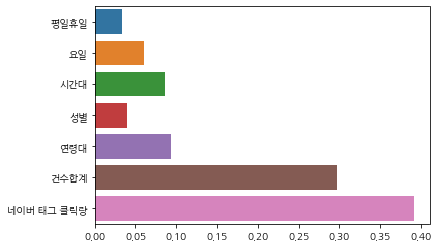

In [54]:
import seaborn as sns
%matplotlib inline

importance = dt_clf.feature_importances_

columns=['평일휴일','요일','시간대',
                         '성별','연령대','건수합계',
                         '네이버 태그 클릭량']

sns.barplot(x=importance, y=columns)